# Traffic Light Classifier
## Class demonstration notebook

## Imports
### Set imports relative to this file
If notebook is not in curent working directory path must be set

In [1]:
import os
import sys
# Get current working directory
cwd = os.path.abspath(os.path.join('..'))
# print("Is this the module path?", cwd)
MODULE_NAME = 'traffic_light_classifier'
# Check if current working directory is likely correct
cwd_folder = os.path.basename(os.path.normpath(cwd))
if cwd_folder == MODULE_NAME:
    module_path = cwd
else:
    # This must be set by the user
    module_path = "C:\\Users\\willhunt88\\OneDrive\\Documents\\Programming\\Udacity Intro to Self Driving Cars\\Project 6 - Traffic Light Classifier\\traffic_light_classifier"

# Add module to system path
if module_path not in sys.path:
    sys.path.append(module_path)



In [2]:
import helpers
from test_classifier import Tests
from traffic_light_classifier import TrafficLightClassifier
%matplotlib inline

### Load training set to view
Import directories defined
Images loaded and checked

In [3]:
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

path_images = os.path.join(module_path, IMAGE_DIR_TRAINING)
IMAGE_LIST = helpers.load_dataset(path_images)
n_images = len(IMAGE_LIST)
if n_images == 0:
    print("No images loaded")
else:
    print("Loaded {0} images".format(n_images))

Loaded 1187 images


### Initialise classifier class

In [4]:
traffic_light_classifier = TrafficLightClassifier(IMAGE_LIST)

### Inspect images visually
Plot a random sample of images

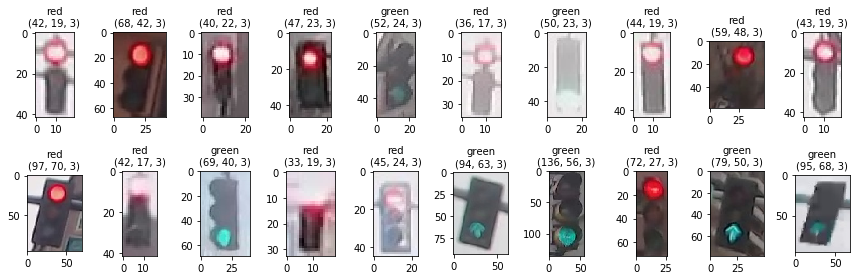

In [5]:
traffic_light_classifier.visualize_image_sample(n_plots=20, randomize=True)

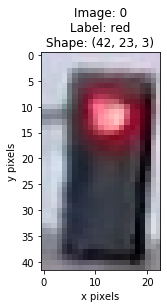

In [6]:
image_index = 0
traffic_light_classifier.visualize_image(image_index)

Take a look at standardized version of image

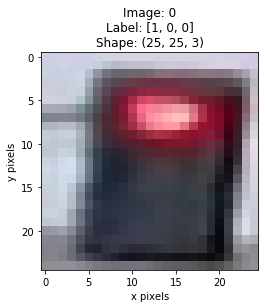

In [7]:
traffic_light_classifier.visualize_image(image_index, list_name='standardized')

Take a look at masked version

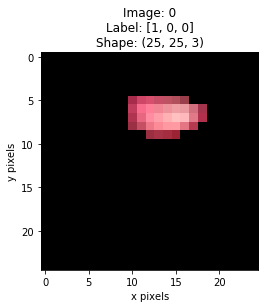

In [8]:
traffic_light_classifier.visualize_image(image_index, list_name='masked')

### Look at misclassfied images

In [11]:
# Can rerun classification in case changes have been made
traffic_light_classifier.classify_images()
n_misclassified = traffic_light_classifier.get_num_misclassifed()
print('Number of misclassifed images =', n_misclassified)
print('Accuracy =', traffic_light_classifier.get_accuracy())

Number of misclassifed images = 103


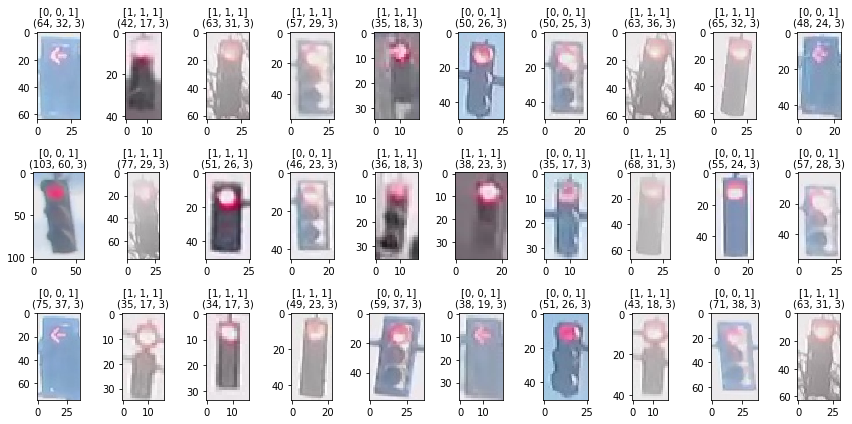

In [12]:
n_plots = min(n_misclassified, 30)
traffic_light_classifier.visualize_image_sample(list_name='misclassified', randomize=False, n_plots=n_plots)